In [1]:
## Import Library
import pandas as pd

## Load dataset
df = pd.read_csv('LaLiga_Matches.csv')
df.head(200)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
195,1995-96,20-12-1995,Sp Gijon,Valencia,1,3,A,0.0,1.0,A
196,1995-96,20-12-1995,Valladolid,Vallecano,1,1,D,0.0,0.0,D
197,1995-96,21-12-1995,La Coruna,Real Madrid,3,0,H,3.0,0.0,H
198,1995-96,03-01-1996,Albacete,Sociedad,3,5,A,2.0,3.0,A


In [4]:
## Describe analytics
df.describe()

,FTHG,FTAG,HTHG,HTAG
count,10883.000000,10883.000000,10881.000000,10881.000000
mean,1.553340,1.116971,0.687713,0.484790
std,1.303854,1.114065,0.840542,0.699772
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,10.000000,8.000000,6.000000,6.000000


In [3]:
## Jumlah setiap baris dan kolom
jumlah_baris, jumlah_kolom = df.shape

print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 10883
Jumlah Kolom: 10


In [5]:
## Tipe data setiap kolom
tipe_data_kolom = df.dtypes

print(tipe_data_kolom)


Season       object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
dtype: object


In [6]:
## Identifikasi data yang hilang atau tidak valid
df.isnull().any()

Season      False
Date        False
HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
HTHG         True
HTAG         True
HTR          True
dtype: bool

In [8]:
## Mengisi Data yang Hilang:
mean = df['HTHG'].mean()
df ['HTHG'].fillna(mean)

0        2.0
1        3.0
2        2.0
3        1.0
4        0.0
        ... 
10878    3.0
10879    0.0
10880    1.0
10881    1.0
10882    0.0
Name: HTHG, Length: 10883, dtype: float64

In [9]:
mean = df['HTAG'].mean()
df ['HTAG'].fillna(mean)


0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
10878    0.0
10879    1.0
10880    2.0
10881    0.0
10882    0.0
Name: HTAG, Length: 10883, dtype: float64

In [10]:
## Menghapus data yang hilang atau tidak valid
df_clean = df.dropna()
df_clean.to_csv('LaLiga_Matches', index=False)

In [11]:
## Total data waktu pada setiap musim
total_date = df['Date'].value_counts()

print(total_date)

31-03-1996    11
12-05-1996    10
16-07-2020    10
23-05-2004    10
11-05-2008    10
              ..
21-11-2011     1
31-10-2011     1
30-04-2018     1
04-05-2018     1
02-10-2023     1
Name: Date, Length: 2942, dtype: int64


In [12]:
## Total data per musim
total_season = df['Season'].value_counts()

print(total_season)


1995-96      462
1996-97      462
2010-11      380
2022-23      380
2021-22      380
2020-21      380
2019-20      380
2018-19      380
2017-18      380
2016-17      380
2015-16      380
2014-15      380
2013-14      380
2012-13      380
2011-12      380
2009-10      380
2008-09      380
2007-08      380
2006-07      380
2005-06      380
2004-05      380
2003-04      380
2002-03      380
2001-02      380
2000-01      380
1999-2000    380
1998-99      380
1997-98      380
2023-24       79
Name: Season, dtype: int64


In [14]:
## Jumlah rata-rata data
rata_rata = df.mean().mean()

print(f"Rata-rata data dalam dataset: {rata_rata}")

Rata-rata data dalam dataset: 0.9607035055833566


<ipython-input-14-a505e8832a55>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rata_rata = df.mean().mean()


In [15]:
## Jumlah kemenangan Home, away dan draw
jumlah_kemenangan_Home = (df['FTR'] == 'H').sum()
jumlah_Draw = (df['FTR'] == 'D').sum()
jumlah_kemenangan_Away = (df['FTR'] == 'A').sum()

print(f"Jumlah Kemenangan Home: {jumlah_kemenangan_Home}")
print(f"Jumlah Draw: {jumlah_Draw}")
print(f"Jumlah Kemenangan away: {jumlah_kemenangan_Away}" )


Jumlah Kemenangan Home: 5154
Jumlah Draw: 2781
Jumlah Kemenangan away: 2948


In [17]:
# Musim dengan Kemenangan Home Terbanyak
# Musim dengan draw terbanyak
# Musim dengan Kemenangan away Terbanyak

kemenangan_per_musim_Home = df[df['FTR'] == 'H'].groupby('Season')['FTR'].count()

musim_terbanyak_home = kemenangan_per_musim_Home.idxmax()
jumlah_kemenangan_terbanyak_home = kemenangan_per_musim_Home.max()

kemenangan_per_musim_away = df[df['FTR'] == 'A'].groupby('Season')['FTR'].count()

musim_terbanyak_away= kemenangan_per_musim_away.idxmax()
jumlah_kemenangan_terbanyak_away = kemenangan_per_musim_away.max()


Draw_per_musim = df[df['FTR'] == 'D'].groupby('Season')['FTR'].count()

musim_terbanyak_Draw = Draw_per_musim.idxmax()
jumlah_Draw_terbanyak = Draw_per_musim.max()


print(f"Musim dengan Kemenangan Home Terbanyak: {musim_terbanyak_home}")
print(f"Jumlah Kemenangan Home Terbanyak: {jumlah_kemenangan_terbanyak_home}")
print('')

print(f"Musim dengan Draw Terbanyak: {musim_terbanyak_Draw}")
print(f"Jumlah Draw Terbanyak: {jumlah_Draw_terbanyak}")
print('')

print(f"Musim dengan Kemenangan away Terbanyak: {musim_terbanyak_away}")
print(f"Jumlah Kemenangan away Terbanyak: {jumlah_kemenangan_terbanyak_away}")

Musim dengan Kemenangan Home Terbanyak: 1996-97
Jumlah Kemenangan Home Terbanyak: 220

Musim dengan Draw Terbanyak: 1995-96
Jumlah Draw Terbanyak: 130

Musim dengan Kemenangan away Terbanyak: 1996-97
Jumlah Kemenangan away Terbanyak: 123


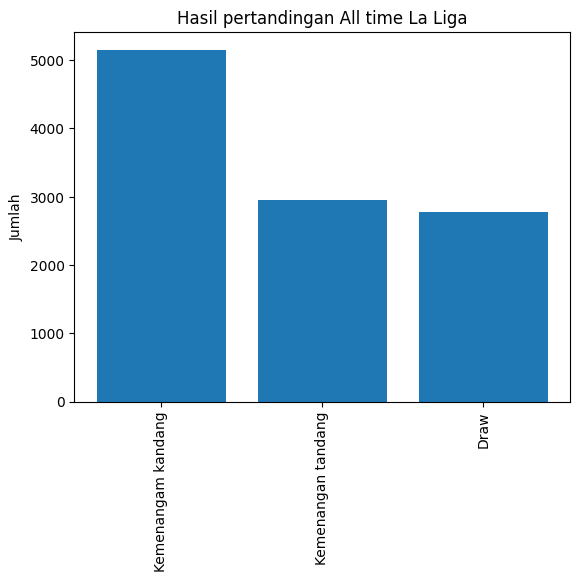

In [45]:
## Visualisasi tentang jumlah kemenagan Home dan Away
import matplotlib.pyplot as plt
import numpy as np

kolom = ['Kemenangam kandang', 'Kemenangan tandang','Draw']
baris = [5154,2948,2781]

x_coords = np.arange(len(kolom))
plt.bar(
    x_coords,
    baris,
    tick_label= kolom
)

plt.xticks(rotation=90)
plt.ylabel('Jumlah')
plt.title('Hasil pertandingan All time La Liga')

plt.show()

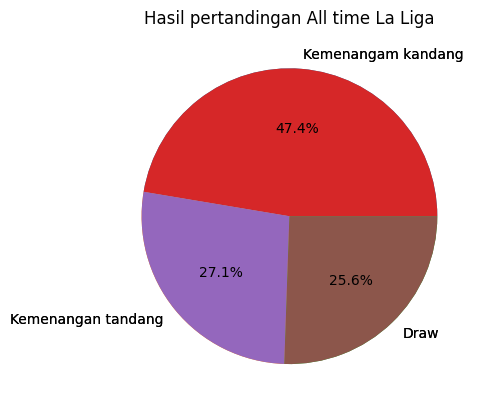

In [44]:
import matplotlib.pyplot as plt

kolom = ['Kemenangam kandang', 'Kemenangan tandang','Draw']
baris = [5154,2948,2781]
plt.pie(baris, labels=kolom)

plt.title('Hasil pertandingan All time La Liga')
plt.pie(
    baris,
    labels=kolom,
    autopct= '%1.1f%%'
)

plt.show()